In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 9 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
plt.rc('font', family='NanumBarunGothic')

#### data 불러오기

In [5]:
df = pd.read_pickle('/content/drive/MyDrive/문화관광 빅데이터 공모전/대참사/최종20대.pkl')

In [6]:
df

,관광지역_시군구,농촌마을_수,농촌마을_체험_평균등급,농촌마을_교육_평균등급,농촌마을_숙박_평균등급,농촌마을_음식_평균등급,농촌마을_으뜸촌_선정수,카드_총_이용금액,카드_총_이용건수,카드_관광쇼핑_이용건수,...,쇼핑,관광지편의시설,관광종사자의친절성,체험프로그램,관광지물가,관광지혼잡도,재방문의도,타인추천의도,평균인당비용,여행객수
0,강원 강릉시,12,1.417,2.333,1.500,1.556,0,1.851607e+10,404279.0,64693.0,...,4.21,4.11,4.24,4.21,3.85,3.98,4.09,4.03,181012.0,1791143.5
1,강원 고성군,2,2.000,3.000,2.000,2.000,0,4.580152e+09,100803.0,2757.0,...,4.00,4.38,4.14,4.00,3.75,4.38,4.11,4.00,185983.0,116328.5
2,강원 동해시,2,2.000,2.000,1.000,1.824,0,1.566479e+09,33655.0,1109.0,...,3.75,4.07,3.93,3.50,3.67,4.27,4.07,3.93,150166.0,179791.4
3,강원 삼척시,9,1.750,2.000,1.714,2.000,0,3.256333e+09,52380.0,913.0,...,4.15,4.20,4.15,4.23,3.80,4.05,4.25,4.05,178133.0,255694.1
4,강원 속초시,1,2.000,1.996,1.860,1.824,0,8.113997e+09,207626.0,9115.0,...,4.24,4.10,4.26,4.20,3.85,3.98,4.08,4.03,175561.0,781308.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,충북 제천시,7,1.714,3.000,1.833,1.750,0,5.381105e+09,110959.0,2589.0,...,4.33,4.17,4.28,4.25,4.11,3.94,3.94,4.06,107557.0,223890.9
139,충북 증평군,4,2.000,2.000,2.000,1.667,0,4.814331e+08,17794.0,20.0,...,5.00,4.00,5.00,NaN,4.00,4.00,4.00,4.00,125000.0,12774.2
140,충북 진천군,2,1.500,1.996,1.500,2.000,0,7.629434e+08,14981.0,20.0,...,5.00,4.00,4.50,4.00,5.00,4.00,4.00,4.00,87500.0,11648.5
141,충북 청주시,5,2.250,2.000,2.600,3.000,0,1.224662e+10,263289.0,1017.0,...,4.17,4.22,4.04,4.29,3.87,4.04,3.91,3.91,81586.0,156344.0


In [7]:
# 사용하지 않을 변수 제거
df.drop(['카드_총_이용금액', '카드_총_이용건수', '카드_평일_이용건수','카드_여행사_이용건수'], axis=1, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 0 to 142
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   관광지역_시군구      143 non-null    object 
 1   농촌마을_수        143 non-null    int64  
 2   농촌마을_체험_평균등급  143 non-null    float64
 3   농촌마을_교육_평균등급  143 non-null    float64
 4   농촌마을_숙박_평균등급  143 non-null    float64
 5   농촌마을_음식_평균등급  143 non-null    float64
 6   농촌마을_으뜸촌_선정수  143 non-null    int64  
 7   카드_관광쇼핑_이용건수  114 non-null    float64
 8   카드_교통_이용건수    103 non-null    float64
 9   카드_숙박_이용건수    142 non-null    float64
 10  카드_체험_이용건수    140 non-null    float64
 11  카드_주말_이용건수    142 non-null    float64
 12  자연경관          136 non-null    float64
 13  문화유산          130 non-null    float64
 14  교통            136 non-null    float64
 15  숙박시설          105 non-null    float64
 16  식당및음식         134 non-null    float64
 17  쇼핑            128 non-null    float64
 18  관광지편의시설       134 non-null    

#### 결측치 처리

In [9]:
# 결측치 확인
df.isnull().sum()

관광지역_시군구         0
농촌마을_수           0
농촌마을_체험_평균등급     0
농촌마을_교육_평균등급     0
농촌마을_숙박_평균등급     0
농촌마을_음식_평균등급     0
농촌마을_으뜸촌_선정수     0
카드_관광쇼핑_이용건수    29
카드_교통_이용건수      40
카드_숙박_이용건수       1
카드_체험_이용건수       3
카드_주말_이용건수       1
자연경관             7
문화유산            13
교통               7
숙박시설            38
식당및음식            9
쇼핑              15
관광지편의시설          9
관광종사자의친절성        8
체험프로그램          19
관광지물가            8
관광지혼잡도           7
재방문의도            7
타인추천의도           7
평균인당비용           7
여행객수             7
dtype: int64

In [10]:
# 뒤 부분 모두 null인 데이터 => 우선 제거하기
df[df['여행객수'].isnull()]

,관광지역_시군구,농촌마을_수,농촌마을_체험_평균등급,농촌마을_교육_평균등급,농촌마을_숙박_평균등급,농촌마을_음식_평균등급,농촌마을_으뜸촌_선정수,카드_관광쇼핑_이용건수,카드_교통_이용건수,카드_숙박_이용건수,...,쇼핑,관광지편의시설,관광종사자의친절성,체험프로그램,관광지물가,관광지혼잡도,재방문의도,타인추천의도,평균인당비용,여행객수
5,강원 양구군,6,2.000,2.333,1.333,1.000,0,NaN,126.0,4690.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,강원 화천군,5,2.000,1.996,2.000,2.000,0,NaN,65.0,4381.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41,경남 의령군,5,1.250,2.500,1.800,1.250,0,NaN,NaN,769.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62,경북 영양군,4,2.000,2.000,1.750,2.000,0,NaN,NaN,864.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,경북 울주군,1,3.000,1.996,3.000,1.824,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,경북 의성군,4,2.750,2.667,1.750,2.000,0,NaN,21.0,2321.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117,충남 계룡시,1,1.815,1.996,1.860,1.824,0,NaN,NaN,4325.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df = df.drop(df[df['여행객수'].isnull()].index, axis=0).reset_index(drop=True)

In [12]:
# 다시 결측치 확인
df.isnull().sum()

관광지역_시군구         0
농촌마을_수           0
농촌마을_체험_평균등급     0
농촌마을_교육_평균등급     0
농촌마을_숙박_평균등급     0
농촌마을_음식_평균등급     0
농촌마을_으뜸촌_선정수     0
카드_관광쇼핑_이용건수    22
카드_교통_이용건수      36
카드_숙박_이용건수       0
카드_체험_이용건수       1
카드_주말_이용건수       0
자연경관             0
문화유산             6
교통               0
숙박시설            31
식당및음식            2
쇼핑               8
관광지편의시설          2
관광종사자의친절성        1
체험프로그램          12
관광지물가            1
관광지혼잡도           0
재방문의도            0
타인추천의도           0
평균인당비용           0
여행객수             0
dtype: int64

In [13]:
# 이용건수는 0으로
for i in range(12):
  df.iloc[:, i] = df.iloc[:, i].fillna(0)

In [14]:
# 만족도는 평균값으로
for i in range(12, 26):
  df.iloc[:, i] = df.iloc[:, i].fillna(df.iloc[:, i].mean())

#### 변수별 분포 확인

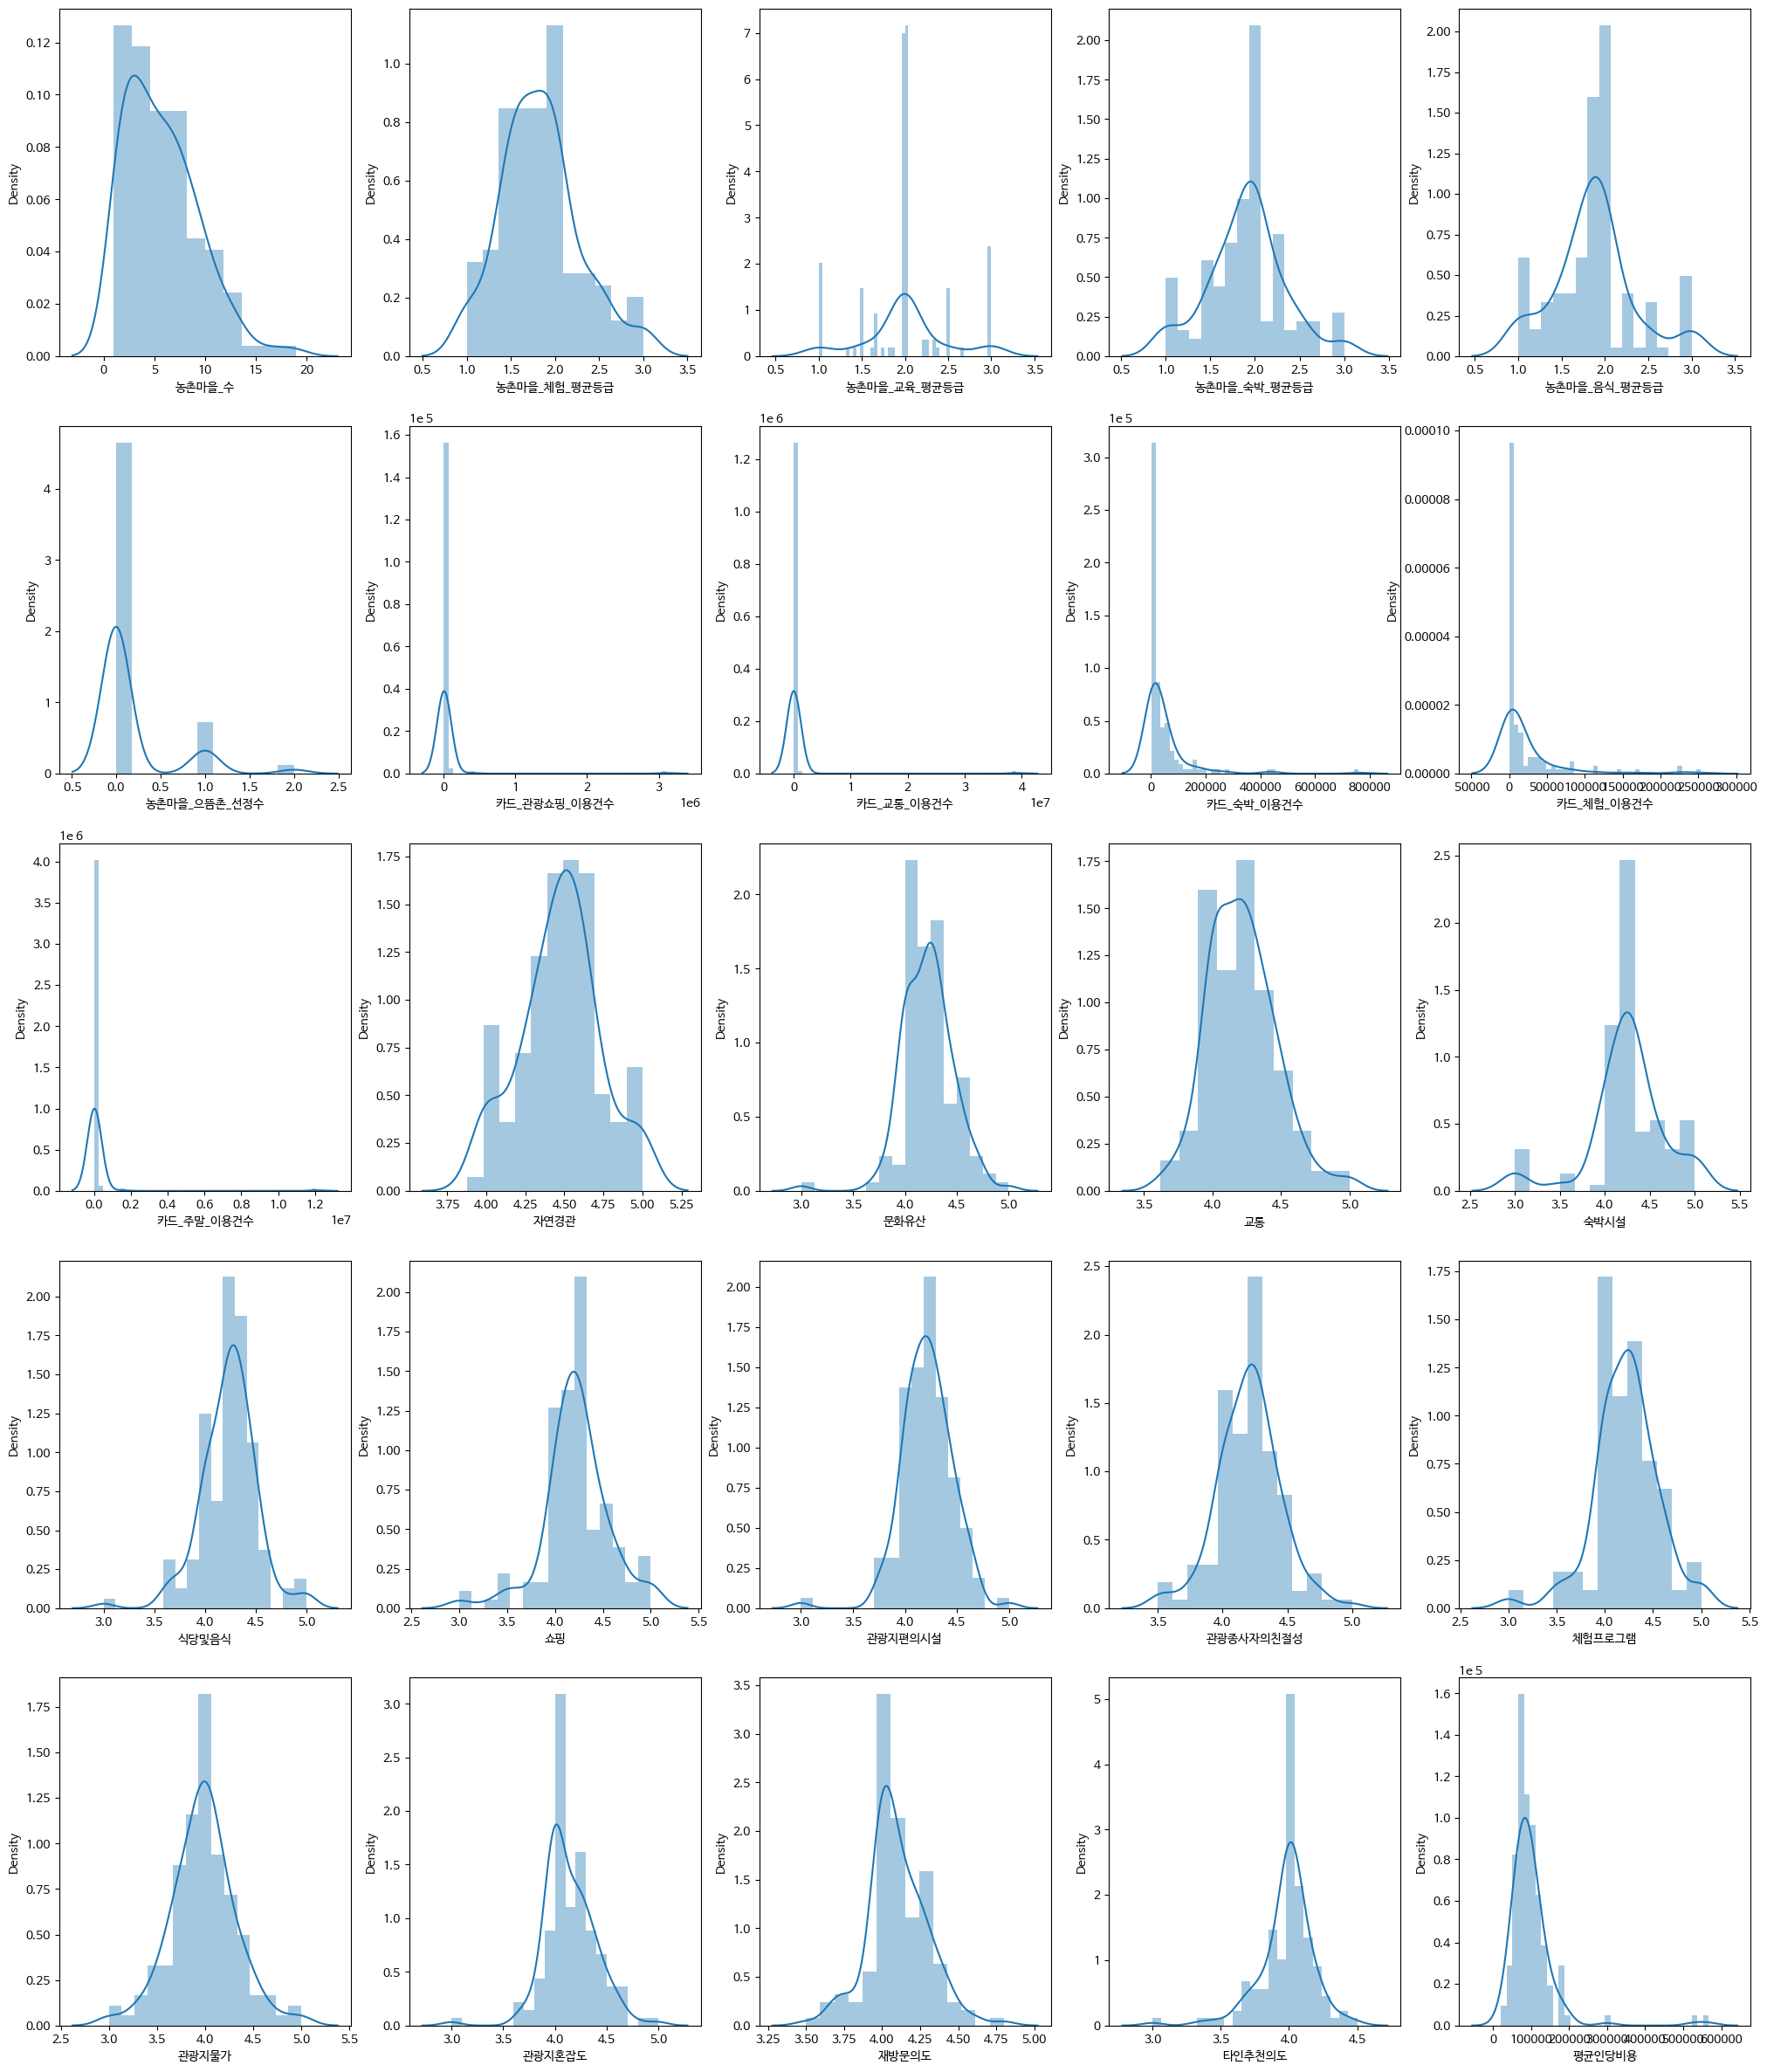

In [15]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(25, 30))
columns = df.iloc[:, 1:-1].columns.tolist()

for row in range(6):
    for col in range(5):
      idx = row * 5 + col
      if idx < len(columns):
        ax = axes[row][col]
        sns.distplot(df.iloc[:, idx+1], ax=ax)
plt.show()

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   관광지역_시군구      136 non-null    object 
 1   농촌마을_수        136 non-null    int64  
 2   농촌마을_체험_평균등급  136 non-null    float64
 3   농촌마을_교육_평균등급  136 non-null    float64
 4   농촌마을_숙박_평균등급  136 non-null    float64
 5   농촌마을_음식_평균등급  136 non-null    float64
 6   농촌마을_으뜸촌_선정수  136 non-null    int64  
 7   카드_관광쇼핑_이용건수  136 non-null    float64
 8   카드_교통_이용건수    136 non-null    float64
 9   카드_숙박_이용건수    136 non-null    float64
 10  카드_체험_이용건수    136 non-null    float64
 11  카드_주말_이용건수    136 non-null    float64
 12  자연경관          136 non-null    float64
 13  문화유산          136 non-null    float64
 14  교통            136 non-null    float64
 15  숙박시설          136 non-null    float64
 16  식당및음식         136 non-null    float64
 17  쇼핑            136 non-null    float64
 18  관광지편의시설       136 non-null    

#### 편차 큰 컬럼 - 로그변환

In [17]:
# 카드 관련 컬럼 로그변환하기
df_log = df.copy()
df_log.iloc[:, 7:12] = np.log1p(df_log.iloc[:, 7:12])
df_log.iloc[:, -2] = np.log1p(df_log.iloc[:, -2])

#### 로그변환 + 모든변수 표준 scaling

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
df_scaled = df_log.copy()
scaler = StandardScaler()
df_scaled.iloc[:,1:-1] = scaler.fit_transform(df_scaled.iloc[:,1:-1])

In [20]:
df_scaled

,관광지역_시군구,농촌마을_수,농촌마을_체험_평균등급,농촌마을_교육_평균등급,농촌마을_숙박_평균등급,농촌마을_음식_평균등급,농촌마을_으뜸촌_선정수,카드_관광쇼핑_이용건수,카드_교통_이용건수,카드_숙박_이용건수,...,쇼핑,관광지편의시설,관광종사자의친절성,체험프로그램,관광지물가,관광지혼잡도,재방문의도,타인추천의도,평균인당비용,여행객수
0,강원 강릉시,1.740522,-0.933438,0.692589,-0.942570,-0.669781,-0.405442,1.777414,0.969927,1.878204,...,-0.038898,-0.436573,0.153083,-2.670840e-02,-0.396927,-0.648228,-0.057099,0.241924,1.581862,1791143.5
1,강원 고성군,-1.021567,0.377247,2.097091,0.218841,0.275925,-0.405442,0.792937,-0.619908,1.102777,...,-0.657581,0.681277,-0.260241,-6.589691e-01,-0.695119,0.964928,0.045078,0.089366,1.642731,116328.5
2,강원 동해시,-1.021567,0.377247,-0.008609,-2.103981,-0.098950,-0.405442,0.508953,0.964493,0.435480,...,-1.394109,-0.602181,-1.128222,-2.164352e+00,-0.933673,0.521310,-0.159277,-0.266603,1.162120,179791.4
3,강원 삼척시,0.911896,-0.184796,-0.008609,-0.445486,0.275925,-0.405442,0.448332,0.432245,0.744728,...,-0.215664,-0.063957,-0.218909,3.350690e-02,-0.546023,-0.365925,0.760320,0.343629,1.545841,255694.1
4,강원 속초시,-1.297776,0.377247,-0.017031,-0.106354,-0.098950,-0.405442,1.165966,1.783076,1.074969,...,0.049485,-0.477975,0.235748,-5.681605e-02,-0.396927,-0.648228,-0.108188,0.241924,1.513164,781308.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,충북 제천시,0.359478,-0.265731,2.097091,-0.169071,-0.256567,-0.405442,0.773328,0.022646,0.325162,...,0.314635,-0.188162,0.318413,9.372221e-02,0.378373,-0.809543,-0.823430,0.394482,0.412335,223890.9
132,충북 증평군,-0.469149,0.377247,-0.008609,0.218841,-0.433354,-0.405442,-0.729019,-0.133389,-0.698011,...,2.288529,-0.891994,3.294346,2.674097e-15,0.050361,-0.567570,-0.516898,0.089366,0.750004,12774.2
133,충북 진천군,-1.021567,-0.746839,-0.017031,-0.942570,0.275925,-0.405442,-0.729019,-0.272571,-0.019836,...,2.288529,-0.891994,1.227726,-6.589691e-01,3.032283,-0.567570,-0.516898,0.089366,-0.051353,11648.5
134,충북 청주시,-0.192940,0.939289,-0.008609,1.612534,2.405892,-0.405442,0.481957,1.012824,1.744306,...,-0.156742,0.018847,-0.673565,2.141528e-01,-0.337288,-0.406254,-0.976696,-0.368308,-0.208582,156344.0


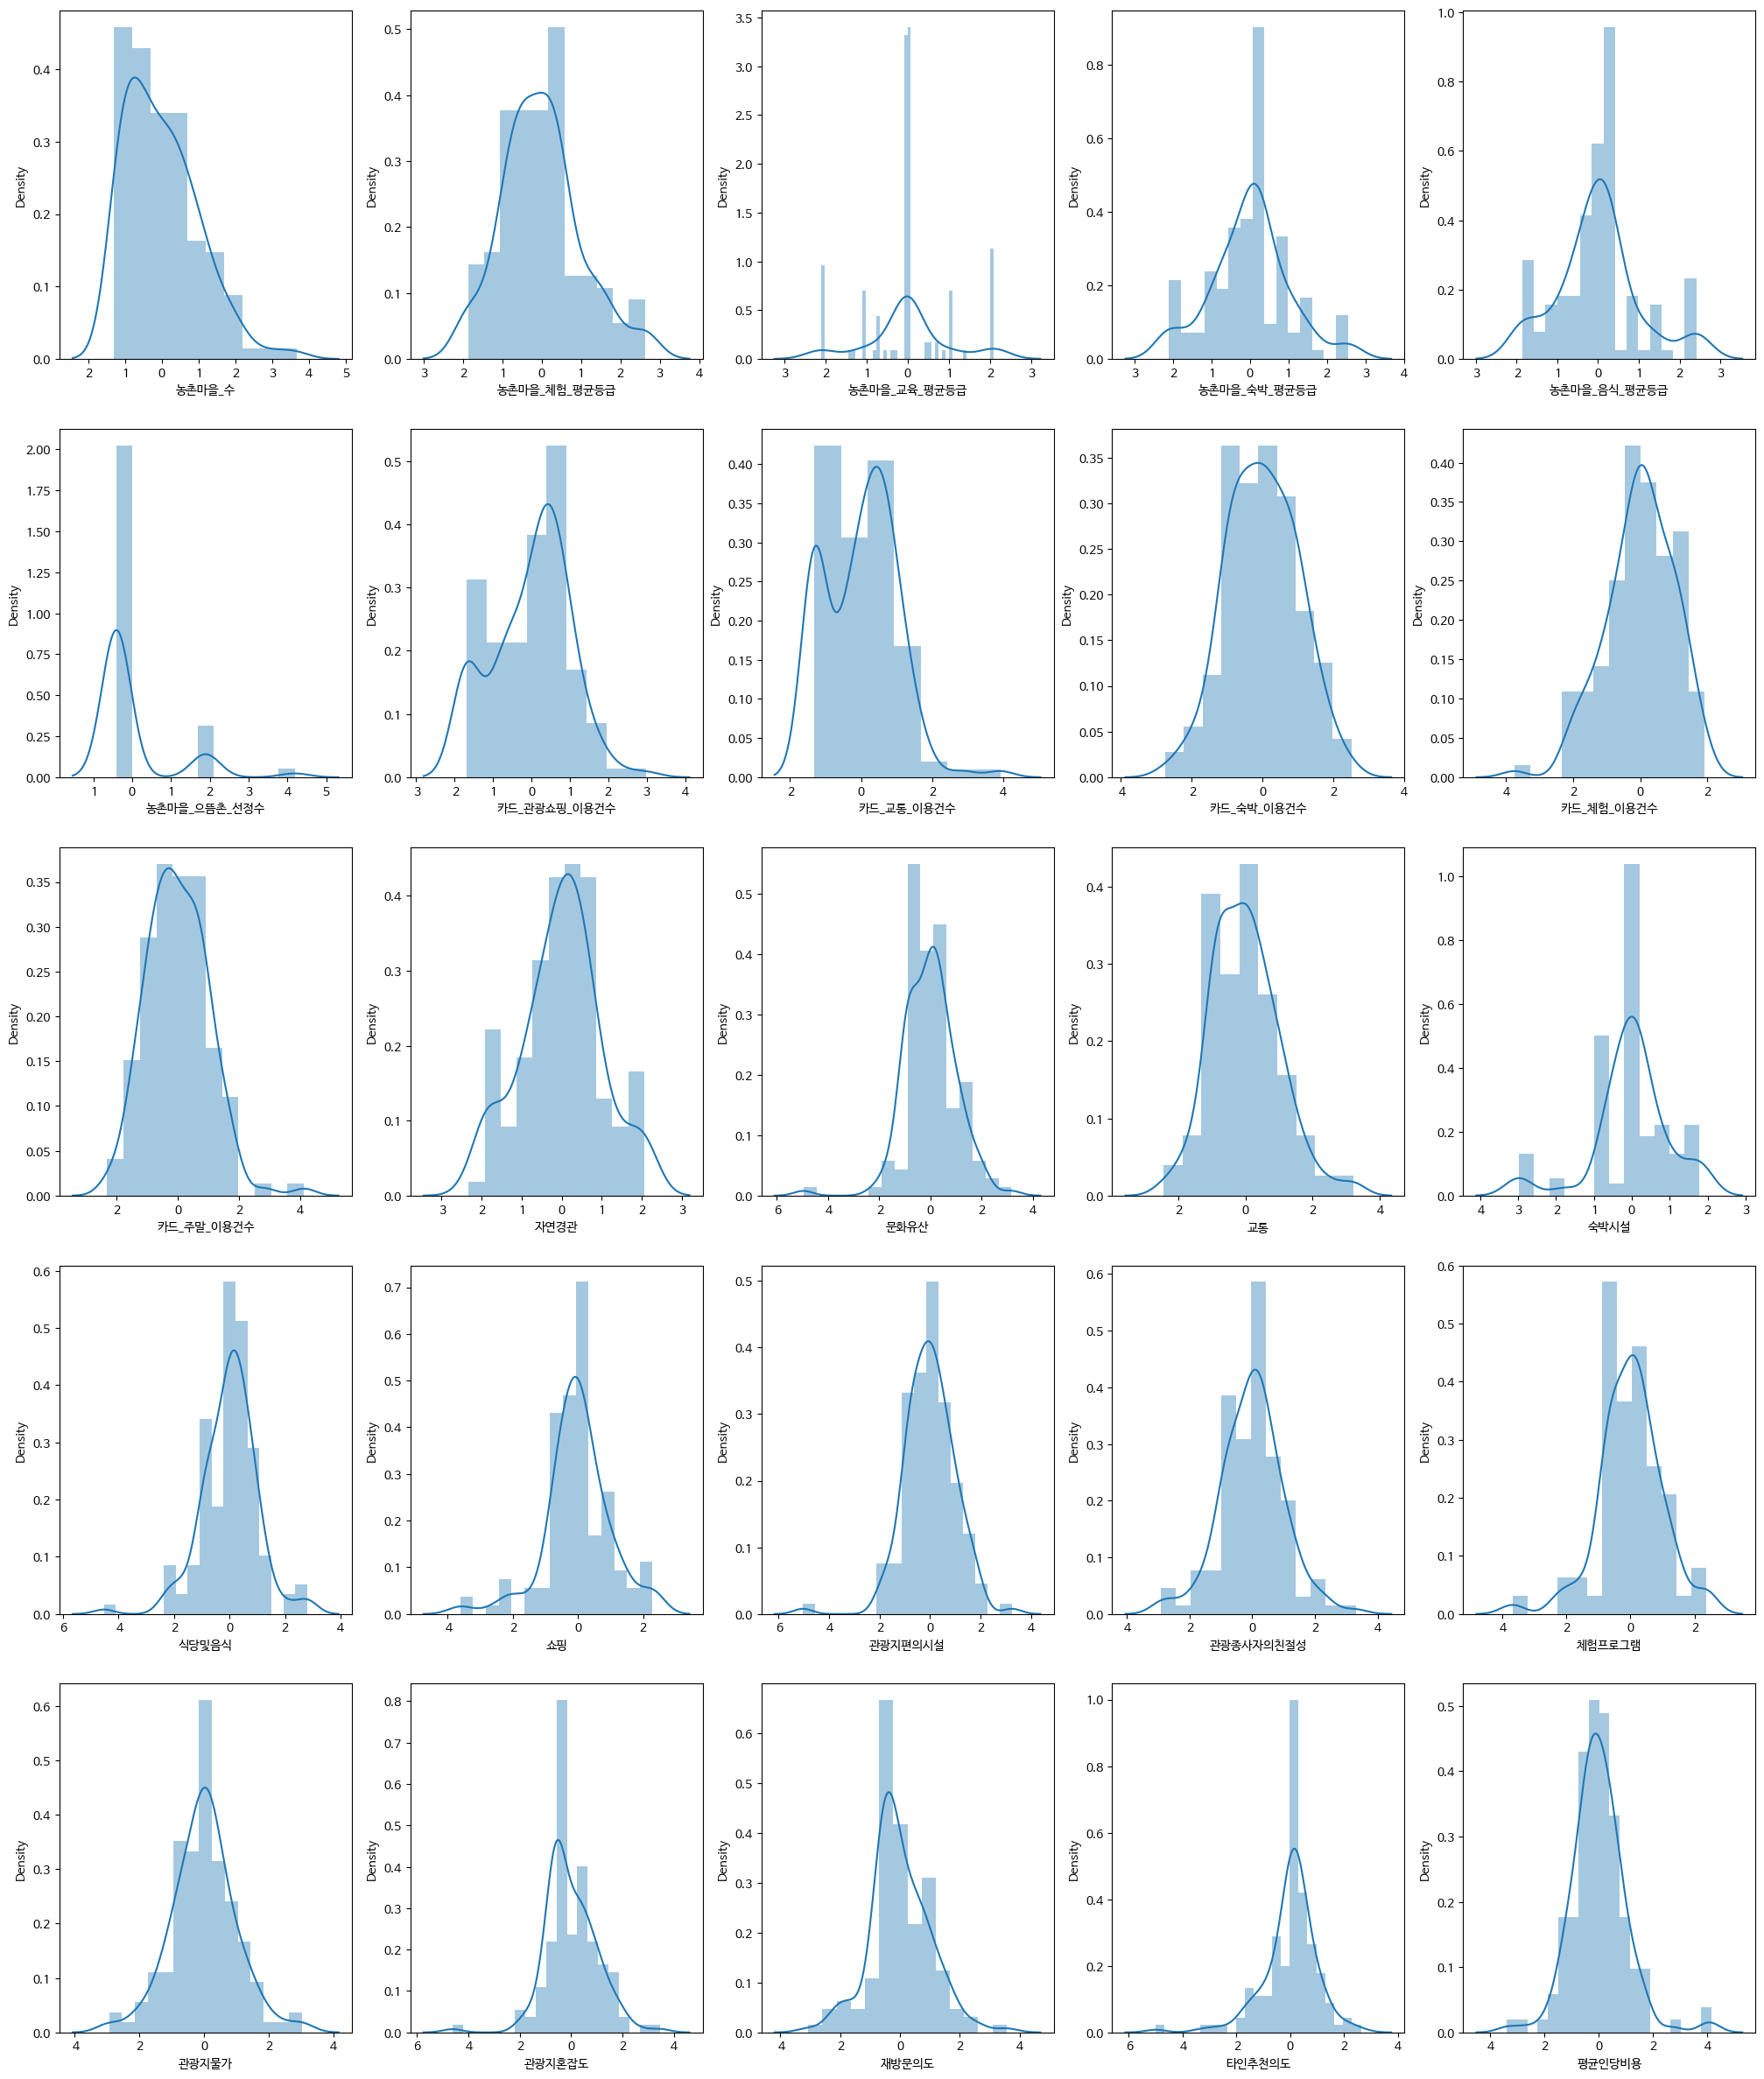

In [21]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(25, 30))
columns = df_scaled.iloc[:, 1:-1].columns.tolist()

for row in range(6):
    for col in range(5):
      idx = row * 5 + col
      if idx < len(columns):
        ax = axes[row][col]
        sns.distplot(df_scaled.iloc[:, idx+1], ax=ax)
plt.show()

In [22]:
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
res = ols('여행객수~' + '+'.join(df_scaled.iloc[:, 1:-1].columns), data=df_scaled.iloc[:, 1:]).fit()        ######
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   여행객수   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.385
Method:                 Least Squares   F-statistic:                     4.382
Date:                Sat, 29 Jul 2023   Prob (F-statistic):           3.36e-08
Time:                        14:16:12   Log-Likelihood:                -1878.0
No. Observations:                 136   AIC:                             3808.
Df Residuals:                     110   BIC:                             3884.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     2.329e+05   2.29e+04     10.159      0.000    1.87e+05    2.78e+05
농촌마을_수        4.002e+04   2.73e+04      1.464      0.146   -1.42e+04    9.42e+04
농촌마을_체험_평균등급 -4032.7559   3.12e+04     -0.129      0.897   -6.58e+04    5.78e+04
농촌마을_교육_평균등급 -4294.4541   2.71e+04     -0.159      0.874   -5.79e+04    4.94e+04
농촌마을_숙박_평균등급 -4229.6816   3.08e+04     -0.137      0.891   -6.54e+04    5.69e+04
농촌마을_음식_평균등급  -1.68e+04   2.67e+04     -0.630      0.530   -6.97e+04    3.61e+04
농촌마을_으뜸촌_선정수  3233.0908   3.05e+04      0.106      0.916   -5.73e+04    6.38e+04
카드_관광쇼핑_이용건수  8.011e+04   3.39e+04      2.366      0.020     1.3e+04    1.47e+05
카드_교통_이용건수   -4587.5367   3.36e+04     -0.137      0.892   -7.12e+04     6.2e+04
카드_숙박_이용건수    5.762e+04   5.11e+04      1.127      0.262   -4.37e+04    1.59e+05
카드_체험_이용건수    8.243e+04   3.87e+04      2.132      0.035    5806.319    1.59e+05
카드_주말_이용건수    6494.1866   6.77e+04      0.096      0.924   -1.28e+05    1.41e+05
자연경관          1.142e+04   2.97e+04      0.385      0.701   -4.75e+04    7.03e+04
문화유산           409.8437   2.71e+04      0.015      0.988   -5.34e+04    5.42e+04
교통            2.614e+04   2.81e+04      0.929      0.355   -2.96e+04    8.19e+04
숙박시설          1.083e+04   2.78e+04      0.390      0.697   -4.42e+04    6.59e+04
식당및음식         2.875e+04   3.02e+04      0.952      0.343   -3.11e+04    8.86e+04
쇼핑           -1.804e+04   2.62e+04     -0.688      0.493      -7e+04    3.39e+04
관광지편의시설      -2.906e+04   2.86e+04     -1.015      0.312   -8.58e+04    2.77e+04
관광종사자의친절성    -1.883e+04   3.46e+04     -0.544      0.587   -8.74e+04    4.97e+04
체험프로그램        1.712e+04    2.7e+04      0.634      0.527   -3.64e+04    7.07e+04
관광지물가        -4859.2787   3.25e+04     -0.150      0.881   -6.93e+04    5.95e+04
관광지혼잡도       -9367.5151   3.03e+04     -0.309      0.758   -6.95e+04    5.08e+04
재방문의도         2.626e+04   3.59e+04      0.732      0.466   -4.48e+04    9.74e+04
타인추천의도       -4651.7757   3.18e+04     -0.146      0.884   -6.77e+04    5.84e+04
평균인당비용        6.401e+04   2.83e+04      2.260      0.026    7878.418     1.2e+05
==============================================================================
Omnibus:                       52.195   Durbin-Watson:                   1.861
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              152.359
Skew:                           1.476   Prob(JB):                     8.24e-34
Kurtosis:                       7.263   Cond. No.                         7.60
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(df_scaled.iloc[:,1:-1].values, i) for i in range(df_scaled.iloc[:,1:-1].shape[1])]
vif['features'] = df_scaled.iloc[:,1:-1].columns
vif = vif.sort_values('VIF Factor').reset_index(drop=True)
vif

,VIF Factor,features
0,1.307431,쇼핑
1,1.353485,농촌마을_음식_평균등급
2,1.388632,체험프로그램
3,1.394853,농촌마을_교육_평균등급
4,1.400511,문화유산
5,1.421828,농촌마을_수
6,1.467655,숙박시설
7,1.505853,교통
8,1.526754,평균인당비용
9,1.559582,관광지편의시설


### 단계별 선택법

In [24]:
## 전진 단계별 선택법
import statsmodels.api as sm
variables = df_scaled.columns[1:-1].tolist() ## 설명 변수 리스트

y = df_scaled['여행객수'] ## 반응 변수
selected_variables = [] ## 선택된 변수들
sl_enter = 0.1
sl_remove = 0.1

sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0

In [25]:
while len(variables) > 0:
    remainder = list(set(variables) - set(selected_variables))
    pval = pd.Series(index=remainder) ## 변수의 p-value
    ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서
    ## 선형 모형을 적합한다.
    for col in remainder:
        X = df_scaled[selected_variables+[col]]
        X = sm.add_constant(X)
        model = sm.OLS(y,X).fit()
        pval[col] = model.pvalues[col]

    min_pval = pval.min()
    if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
        selected_variables.append(pval.idxmin())
        ## 선택된 변수들에대해서
        ## 어떤 변수를 제거할지 고른다.
        while len(selected_variables) > 0:
            selected_X = df_scaled[selected_variables]
            selected_X = sm.add_constant(selected_X)
            selected_pval = sm.OLS(y,selected_X).fit().pvalues[1:] ## 절편항의 p-value는 뺀다
            max_pval = selected_pval.max()
            if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
                remove_variable = selected_pval.idxmax()
                selected_variables.remove(remove_variable)
            else:
                break

        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(df_scaled[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

In [26]:
selected_variables

['카드_관광쇼핑_이용건수', '평균인당비용', '카드_체험_이용건수', '농촌마을_수', '카드_숙박_이용건수']

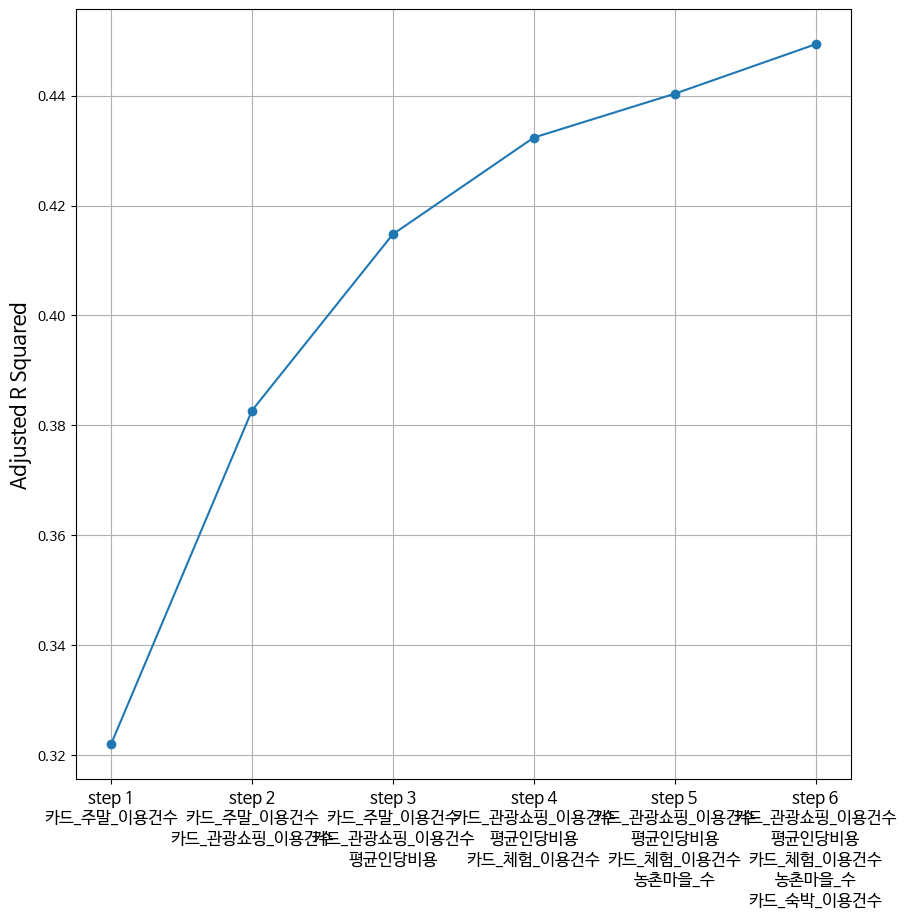

In [28]:
fig = plt.figure(figsize=(10, 10))
fig.set_facecolor('white')

font_size = 15
plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=12)
plt.plot(steps,adjusted_r_squared, marker='o')

plt.ylabel('Adjusted R Squared',fontsize=font_size)
plt.grid(True)
plt.show()

### 최종으로 회귀분석

In [29]:
selected_variables

['카드_관광쇼핑_이용건수', '평균인당비용', '카드_체험_이용건수', '농촌마을_수', '카드_숙박_이용건수']

In [30]:
df_final = df_scaled[selected_variables + ['여행객수']]
df_final

,카드_관광쇼핑_이용건수,평균인당비용,카드_체험_이용건수,농촌마을_수,카드_숙박_이용건수,여행객수
0,1.777414,1.581862,1.214991,1.740522,1.878204,1791143.5
1,0.792937,1.642731,-1.494519,-1.021567,1.102777,116328.5
2,0.508953,1.162120,-0.925864,-1.021567,0.435480,179791.4
3,0.448332,1.545841,-0.274714,0.911896,0.744728,255694.1
4,1.165966,1.513164,1.412025,-1.297776,1.074969,781308.3
...,...,...,...,...,...,...
131,0.773328,0.412335,1.397982,0.359478,0.325162,223890.9
132,-0.729019,0.750004,0.541681,-0.469149,-0.698011,12774.2
133,-0.729019,-0.051353,-1.556463,-1.021567,-0.019836,11648.5
134,0.481957,-0.208582,0.945806,-0.192940,1.744306,156344.0


In [31]:
res = ols('여행객수~' + '+'.join(df_final.iloc[:, :-1].columns), data=df_final).fit()        ######
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   여행객수   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                     23.03
Date:                Sat, 29 Jul 2023   Prob (F-statistic):           1.66e-16
Time:                        14:17:02   Log-Likelihood:                -1881.9
No. Observations:                 136   AIC:                             3776.
Df Residuals:                     130   BIC:                             3793.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     2.329e+05   2.17e+04     10.735      0.000     1.9e+05    2.76e+05
카드_관광쇼핑_이용건수  8.835e+04   2.78e+04      3.173      0.002    3.33e+04    1.43e+05
평균인당비용        6.779e+04   2.51e+04      2.705      0.008    1.82e+04    1.17e+05
카드_체험_이용건수    7.761e+04   2.87e+04      2.709      0.008    2.09e+04    1.34e+05
농촌마을_수        4.154e+04   2.21e+04      1.883      0.062   -2096.323    8.52e+04
카드_숙박_이용건수    5.703e+04   3.22e+04      1.772      0.079   -6628.243    1.21e+05
==============================================================================
Omnibus:                       53.156   Durbin-Watson:                   1.832
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              150.388
Skew:                           1.523   Prob(JB):                     2.21e-33
Kurtosis:                       7.154   Cond. No.                         2.78
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
selected_variables.sort()
selected_variables

['농촌마을_수', '카드_관광쇼핑_이용건수', '카드_숙박_이용건수', '카드_체험_이용건수', '평균인당비용']